#Monitoria 04: Sistemas Especialistas e Árvores de Decisão

Autores: Hugo Amorim - 2020.3 (haan2@ecomp.poli.br), Ana Catarina Fonseca - 2020.1

Duvidas: acgfp@ecomp.poli.br

Este documento foi criado para a disciplina de Inteligencia Artificial do curso de Engenharia da Computação da UPE, ministrada pelo Prof. Fernando Buarque. 

#Sistema especialista baseado em regras

São aplicações que têm por objetivo resolver problemas complexos de
forma idêntica à utilizada pelos peritos humanos.

O sistema especialista utiliza como referência uma base de conhecimento e tem diversas áreas de aplicação, como por exemplo: 

- **interpretação**: inferem descrições de situações a partir da observação de fatos
- **diagnóstico**: inferir mal-funcionamentos de um sistemas a partir de observações
- **planejamento**: desenvolvem-se sistemas capazes de responder à questão de como gerar um plano para resolver um dado problema
- **controle**: o objetivo é dar ordens a um conjunto de entradas de modo a que um
dispositivo ou sistema consiga cumprir adequadamente as suas funções

etc..

-> Faz inferências e deduções a partir de informações fornecidas pelo usuário

SE - ENTÃO - SENÃO - QUANDO

[EXPERT SINTA](https://www.cin.ufpe.br/~fab/expert-sinta/manual.pdf)

cabeca doi igual verdadeiro entao dor de cabeca

moleza igual verdadeiro entao cansaco

febre igual verdadeiro & cansaco igual verdadeiro entao dengue

febre igual verdadeiro & dor de cabeca igual verdadeiro entao gripe

febre igual falso & dor de cabeca igual verdadeiro entao enxaqueca

febre igual verdadeiro & dor de cabeca igual verdadeiro & falta de ar igual verdadeiro entao covid19

temperatura maior ou igual 38 entao febre


In [1]:
# Codigo utilizado para importar aquivos
from google.colab import files
Arquivos = files.upload()

# Organizando as informações do arquivos em variaveis
regras = Arquivos['regras'].decode("utf-8").split("\n")
print(regras)

Saving regras to regras
['cabeca doi igual verdadeiro entao dor de cabeca', 'moleza igual verdadeiro entao cansaco', 'febre igual verdadeiro & cansaco igual verdadeiro entao dengue', 'febre igual verdadeiro & dor de cabeca igual verdadeiro entao gripe', 'febre igual falso & dor de cabeca igual verdadeiro entao enxaqueca', 'febre igual verdadeiro & dor de cabeca igual verdadeiro & falta de ar igual verdadeiro entao covid19', 'temperatura maior ou igual 38 entao febre', '']


In [6]:
#@title Verificar sintomas
Temperatura =  38.8#@param {type:"number"}
cabeca_dor = False #@param {type:"boolean"}
moleza = False #@param {type:"boolean"}
falta_de_ar = False #@param {type:"boolean"}
a = dasçldj

def ler_regras():
  lista_de_regras = []
  for regra in regras:
    regra_i = []
    if regra != '':
	    #Separa a regra em premissas (antes do então) e conclusões (depois do então)
      premissas, conclusoes = regra.split('entao')
	    #Cria uma lista com as conclusões sem espaço
      regra_i.append(conclusoes.replace(" ", ""))
	    #Anda pela lista de premissas. Se tiver &, são premissas compostas
      for premissa in premissas.split('&'):
        regra_j = [] #Lista pra cada premissa
        if premissa != '':
          if 'diferente de' in premissa:
			      #Aqui a gente divide o que tem antes e depois de "diferente de", ou seja, a condição
            variavel = premissa.split('diferente de')[0].replace(" ", "")
            valor = premissa.split('diferente de')[1].replace(" ", "")
            regra_j.append(variavel)
            regra_j.append('diferente')
            regra_j.append(valor)
          elif 'igual' in regra: #se tiver um igual em i
            if 'maior' in regra:
              variavel = premissa.split('maior ou igual')[0].replace(" ", "")
              valor = premissa.split('maior ou igual')[1].replace(" ", "")
              regra_j.append(variavel)
              regra_j.append('maior ou igual')
            elif 'menor' in regra:
              variavel = premissa.split('menor ou igual')[0].replace(" ", "")
              valor = premissa.split('menor ou igual')[1].replace(" ", "")
              regra_j.append(variavel)
              regra_j.append('menor ou igual')
            else:
              variavel = premissa.split('igual')[0].replace(" ", "")
              valor = premissa.split('igual')[1].replace(" ", "")
              regra_j.append(variavel)
              regra_j.append('igual')
            regra_j.append(valor)
          else:
            print("Condicional invalida, favor utilize 'igual' ou 'diferente de'")
          regra_i.append(regra_j) #regra_i = ['febre', ['temperatura', 'maior ou igual', '38']]
      lista_de_regras.append(regra_i)
  return lista_de_regras

# Função que le as regras e retorna uma lista de verificações que serão feitas 
# nos dados
def verificar_regras(conclusoes, variaveis_de_entrada, regra_avaliada, 
                     regras_completo):

  n_condicoes_aceitas = 0 #Numero de condições aceitas
  ja_contem_conclusao = False
  for conclusao in conclusoes:
    if conclusao[0] == regra_avaliada[0]: #Verifica se aquela conclusão já foi verificada, para evitar a rechecagem
      ja_contem_conclusao  = True

  if not ja_contem_conclusao: #se a conclusão não foi avaliada ainda
    for condicao in regra_avaliada[1:]: #para cada condicional da regra que está sendo avaliada
      #o formato da condição é do tipo ['febre', 'igual', 'verdadeiro']
      entrada = condicao[0]
      condicional = condicao[1]
      saida = condicao[2]
    
      # transformar linguagem natural em codigo
      if saida == 'verdadeiro':
        saida = True
      if saida == 'falso':
        saida = False

      # verifica se o parametro esta nas variaveis de entrada (o dicionário mapeando os nomes no texto com as variáveis recebidas no form)
      if entrada in variaveis_de_entrada:

        # transformar condicionais em linguagem natural em ifs e incremento o contador de condições aceitas
        if condicional == 'maior ou igual':
          if variaveis_de_entrada[entrada] >= float(saida):
            n_condicoes_aceitas += 1
        elif condicional == 'menor ou igual':
          if variaveis_de_entrada[entrada] <= float(saida):
            n_condicoes_aceitas += 1
        elif condicional == 'igual':
          if variaveis_de_entrada[entrada] == saida:
            n_condicoes_aceitas += 1
        elif condicional == 'diferente':
          if variaveis_de_entrada[entrada] != saida:
            n_condicoes_aceitas += 1
        else:
          print('Erro na operador, não foi identificado: ', condicional)

      # verifica se o parametro esta nas conclusoes (alguma conclusão usa essa regra? tipo covid usa febre)
      elif [entrada, True] in conclusoes:

        # transformar condicionais em linguagem natural em ifs
        if condicional == 'igual':
          if saida: 
            n_condicoes_aceitas += 1
        if condicional == 'diferente' :
          if saida == False:
            n_condicoes_aceitas += 1

      elif [entrada, False] in conclusoes:
        if condicional == 'igual':
          if saida == False:
            n_condicoes_aceitas += 1
        if condicional == 'diferente' :
          if saida: #falso é diferente de verdade kkk
            n_condicoes_aceitas += 1 
      
      else:
        for regra in regras_completo:
          if regra[0] == entrada:
            conclusoes = verificar_regras(conclusoes, variaveis_de_entrada, regra, 
                     regras_completo)
            # reverifica as conclusoes
            if [entrada, True] in conclusoes:
              # transformar condicionais em linguagem natural em ifs
              if condicional == 'igual':
                if saida:
                  n_condicoes_aceitas += 1
              if condicional == 'diferente' :
                if saida == False:
                  n_condicoes_aceitas += 1

            elif [entrada, False] in conclusoes:
              if condicional == 'igual':
                if saida == False:
                  n_condicoes_aceitas += 1
              if condicional == 'diferente' :
                if saida:
                  n_condicoes_aceitas += 1 
            break
        else:
          print('Entrada nao encontrada: ', entrada)

      # verifica se todas as condições foram cumpridas
      if n_condicoes_aceitas == (len(regra_avaliada)-1):
        conclusoes.append([regra_avaliada[0], True])
    for i in conclusoes: #for - else
      if i[0] == regra_avaliada[0]: #se minha regra q eu to avaliado ja esta em conclusoes, retorna conclusoes.
        return conclusoes
    else:
      #senao minha regra nao esta nas conclusoes e portanto eh falsa
      conclusoes.append([regra_avaliada[0], False])
      return conclusoes
  return conclusoes

# Função que verifica a saida
def verificar_dados():
  regras_organizadas = ler_regras()
  variaveis_de_entrada = {
      'temperatura': Temperatura,
      'cabecadoi': cabeca_dor,
      'moleza': moleza,
      'faltadear': falta_de_ar
      }

  conclusoes = [] 
  for regra_avaliada in regras_organizadas:
    conclusoes = verificar_regras(conclusoes, variaveis_de_entrada, regra_avaliada, 
                     regras_organizadas)
  return conclusoes

        
for i in verificar_dados():
  
  if i[1]:
    print("Com as informações dadas, conclui-se que é possível que seja: ", i[0], ".")

Com as informações dadas, conclui-se que é possível que seja:  febre .


#Árvore de Decisão


Utilizando uma base de dados e calculos estatisticos o algoritmo define quais os melhores parametros para a raiz e os nós. Uma das possiveis equações utilizadas para definir os nós é:

$ Gini = 1 - \sum\limits_{i=0}^{c-1} \left(p(i)\right)^{2} $

Onde:

*   $c$ = Número de elementos
*   $i$ = Elemento $i$
*   $p(i)$ = Probabilidade de $i$

Passo-a-passo:

Entradas: **A e B**

Saida: **d**

A | B | d
--- | --- | ---
T | F | +
T | T | +
T | T | +
T | F | -
T | T | +
F | F | -
F | F | -
F | F | -
T | T | -
T | F | -

**1. A partir dos dados criamos as tabelas de frequencia:**

d | A = T | A = F
--- | :-: | :-:
+ | 4 | 0 
- | 3 | 3 

d | B = T | B = F
--- | :-: | :-:
+ | 3 | 1 
- | 1 | 5 

**2. Definimos o Gini da origem:**

$G_{origem} = 1 - \left (\frac{4}{10}  \right )^2 - \left (\frac{6}{10}  \right )^2 = 0.48$ 

**3. Definimos o ganho de A**

$G_{A=T} = 1 - \left (\frac{4}{7}  \right )^2 - \left (\frac{3}{7}  \right )^2 = 0.4898$ 

$G_{A=F} = 1 - \left (\frac{3}{3}  \right )^2 - \left (\frac{0}{3}  \right )^2 = 0$ 

$\Delta_{A} = G_{origem} - \frac{7}{10} G_{A=T} - \frac{3}{10} G_{A=F} = 0.137$

**4. Definimos o ganho de B**

$G_{B=T} = 1 - \left (\frac{3}{4}  \right )^2 - \left (\frac{1}{4}  \right )^2 = 0.375$ 

$G_{B=F} = 1 - \left (\frac{1}{6}  \right )^2 - \left (\frac{5}{6}  \right )^2 = 0.2778$ 

$\Delta_{B} = G_{origem} - \frac{4}{10} G_{B=T} - \frac{6}{10} G_{B=F} = 0.16332$

**5. Comparamos os ganhos e escolhemos a melhor opção**

Como $\Delta_{B} > \Delta_{A}$ utilizamos o vamor da entreda B como raiz

**6. Separa a tabela em B=f e B=t e refazer o processo até que todas as entradas sejam avaliadas**



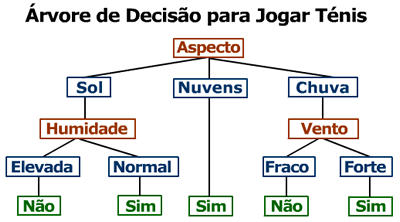

In [11]:
# Dados de entrada para arvore de decisao

entrada_a = [True, True, True, True, True, False, False, False, True, True]
entrada_b = [False, True, True, False, True, False, False, False, True, False]
saida = ['+', '+', '+', '-', '+', '-', '-', '-', '-', '-']

possiveis_entradas = [True, False]
possiveis_saidas = ['+', '-'] #classes

In [12]:
# Implementação de uma arvore binaria

class Arvore:
  def __init__(self, valor):
    self.valor = valor
    self.arvore_esquerda = 0
    self.arvore_direita = 0
  

# Calcular Gini

#saidas e classes
def gini_origem(saidas, possibilidades):
  quantidade_de_cada_saida = [0]*len(possibilidades)
  #faz a contagem
  for i in saidas:
    for j in range(0, len(possibilidades)): #para cada classe
      if i == possibilidades[j]:
        quantidade_de_cada_saida[j] += 1

  gini = 1
  for i in quantidade_de_cada_saida:
    gini -= (i/len(saidas))**2

  return gini

def ganho_entrada(entrada, possiveis_entradas, saidas, possiveis_saidas):
  quantidade_de_cada_saida = [0]*len(possiveis_entradas)*len(possiveis_saidas)

  
  for index, i in enumerate(entrada):
    for index_entrada, k in enumerate(possiveis_entradas):
      if i == k:
        for index_saida, j in enumerate(possiveis_saidas):
          if saidas[index] == j: # a saida q corresponde a entrada
            quantidade_de_cada_saida[index_entrada*len(possiveis_saidas) + index_saida] += 1
  
  # quantidade_de_cada_saida = [4, 3, 0, 3] p/ A, [3, 1, 1, 5] p/ B (tabela de frequencias)


  #calculo do ganho:
  gini = [1, 0]*len(possiveis_entradas) # para cada combinação de entrada - classe, o conjunto de gini e total, pra calcular a media ponderada
  indice = 0
  for i in range(0, len(quantidade_de_cada_saida), len(possiveis_saidas)): #step =2
    total = 0
    for j in range(0, len(possiveis_saidas)): #pra cada classe
      gini[indice*2 + 1] += quantidade_de_cada_saida[i + j]
    for j in range(0, len(possiveis_saidas)):
      gini[indice*2] -= (quantidade_de_cada_saida[i + j]/gini[indice*2 + 1])**2
    indice += 1

  ganho = gini_origem(saida, possiveis_saidas)
  #faz o delta
  for i in range(0, int(len(gini)/2)):
    ganho -= gini[2*i] * (gini[2*i + 1]/len(entrada))
  return ganho

origem = gini_origem(saida, possiveis_saidas)
ganho_a = ganho_entrada(entrada_a, possiveis_entradas, saida, possiveis_saidas)
ganho_b = ganho_entrada(entrada_b, possiveis_entradas, saida, possiveis_saidas)

print('Gini Origem: ', origem)
print('Ganho usando entrada A como raiz: ', ganho_a)
print('Ganho usando entrada B como raiz: ', ganho_b)


Gini Origem:  0.48
Ganho usando entrada A como raiz:  0.13714285714285707
Ganho usando entrada B como raiz:  0.16333333333333336


In [13]:
# Biblioteca que utilizo para verificar se uma variavel é uma classe ou não
import inspect
inspect.isclass(Arvore)


# Uma vez definido uma raiz podemos repetir a operação removendo a verificação 
# da raiz

entrada_a_caso_b_verdadeiro = [True, True, True, True]
saida_caso_b_verdadeiro = ['+', '+', '+', '-']
# Como os valores de A foram iguais em todos os casos não precisamos verificar 
# seu valor, e como a saida tem a maioria '+' iremos colocar o valor de '+' 
# nessa folha  

entrada_a_caso_b_falso = [True, True, False, False, False, True]
saida_caso_b_falso = ['+',  '-', '-', '-', '-', '-']
# Nesse caso varificamos que quando A é falso a saida é sempre '-' e que quando 
# A é verdadeiro a saida é '-' na maioria dos casos, por isso não precisamos 
# verificar seu valor e podemos colocar o valor de '-' nessa folha

# Teste - fazendo a classificacao
entrada_a = [['A', False], ['B', True]]
entrada_b = [['A', False], ['B', False]]

def verificar_entrada(entrada):
  # Criando a arvore
  arvore_de_decisao = Arvore('B')
  # Irei usar aqui direita = False e esquerda = True
  arvore_de_decisao.arvore_esquerda = '-'
  arvore_de_decisao.arvore_direita = '+'


  while(True):
    for i in entrada:
      if arvore_de_decisao.valor == i[0]:
        if i[1]:
          arvore_de_decisao = arvore_de_decisao.arvore_esquerda
        else:
          arvore_de_decisao = arvore_de_decisao.arvore_direita
        break
    if not isinstance(arvore_de_decisao, Arvore): #para qndo encontra uma folha (q nao eh instancia de arvore)
      print('Saida de: ', entrada, ' = ', arvore_de_decisao)
      break


verificar_entrada(entrada_a)
verificar_entrada(entrada_b)

Saida de:  [['A', False], ['B', True]]  =  -
Saida de:  [['A', False], ['B', False]]  =  +
